In [959]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os 

In [960]:
#df = pd.read_csv('data_practice')
filename = [filenames for filenames in os.listdir('data_practice')][6:11]
filename

['data_2000.csv',
 'data_2005.csv',
 'data_2010.csv',
 'data_2015.csv',
 'data_2020.csv']

In [961]:
all_data = pd.DataFrame()

for file in filename:
    print(file)
    df = pd.read_csv('./data_practice/' + file)
    #print(df)
    all_data = pd.concat([all_data, df])
    #all_data.to_csv('./data_practice/all_data.csv', index = False)

data_2000.csv
data_2005.csv
data_2010.csv
data_2015.csv
data_2020.csv


In [962]:
df  = pd.read_csv('data_practice/all_data.csv', sep=',', parse_dates = ['Year'])
df 

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,51,Armenia,5610,Import Quantity,115.0,Barley,2000,2000-01-01,tonnes,1386.0,A,Official figure
1,TCL,Crops and livestock products,51,Armenia,5622,Import Value,115.0,Barley,2000,2000-01-01,1000 US$,341.0,A,Official figure
2,TCL,Crops and livestock products,51,Armenia,5608,Import Quantity,2111.0,Cattle,2000,2000-01-01,Head,NaN,M,"Missing value (data cannot exist, not applicable)"
3,TCL,Crops and livestock products,51,Armenia,5622,Import Value,2111.0,Cattle,2000,2000-01-01,1000 US$,NaN,O,Missing value
4,TCL,Crops and livestock products,51,Armenia,5908,Export Quantity,NaN,Cattle,2000,2000-01-01,Head,NaN,M,"Missing value (data cannot exist, not applicable)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,TCL,Crops and livestock products,860,Uzbekistan,5922,Export Value,2140.0,Swine / pigs,2020,2020-01-01,1000 US$,0.0,A,Official figure
1441,TCL,Crops and livestock products,860,Uzbekistan,5610,Import Quantity,111.0,Wheat,2020,2020-01-01,tonnes,2799621.0,A,Official figure
1442,TCL,Crops and livestock products,860,Uzbekistan,5622,Import Value,111.0,Wheat,2020,2020-01-01,1000 US$,556494.0,A,Official figure
1443,TCL,Crops and livestock products,860,Uzbekistan,5910,Export Quantity,111.0,Wheat,2020,2020-01-01,tonnes,48212.0,A,Official figure


In [963]:
df.isnull().sum()

Domain Code           6
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code (CPC)      11
Item                  0
Year Code             0
Year                  0
Unit                  0
Value               109
Flag                  0
Flag Description      0
dtype: int64

In [964]:
columns_replace = ['Domain Code','Item Code (CPC)', 'Value']
for column in columns_replace:
    df[column] = df[column].fillna('unknown')

In [965]:
df.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [966]:
df.Value.value_counts()

0.0        231
unknown    109
1.0         16
3.0         15
2.0         14
          ... 
1649.0       1
10542.0      1
12249.0      1
4992.0       1
10059.0      1
Name: Value, Length: 879, dtype: int64

In [967]:
df[df.isna().any(axis =1)]

#All info that we require here is in the Value column, so Null values existed in this column are not interesting, we could drop them
#df.dropna(inplace=True)
#check again 
df.isnull().sum()
 


Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [968]:
df.dtypes

Domain Code                 object
Domain                      object
Area Code (M49)              int64
Area                        object
Element Code                 int64
Element                     object
Item Code (CPC)             object
Item                        object
Year Code                    int64
Year                datetime64[ns]
Unit                        object
Value                       object
Flag                        object
Flag Description            object
dtype: object

In [969]:
df = df[['Domain', 'Area', 'Element', 'Item', 'Value' , 'Year']]
df.head(10)


,Domain,Area,Element,Item,Value,Year
0,Crops and livestock products,Armenia,Import Quantity,Barley,1386.0,2000-01-01
1,Crops and livestock products,Armenia,Import Value,Barley,341.0,2000-01-01
2,Crops and livestock products,Armenia,Import Quantity,Cattle,unknown,2000-01-01
3,Crops and livestock products,Armenia,Import Value,Cattle,unknown,2000-01-01
4,Crops and livestock products,Armenia,Export Quantity,Cattle,unknown,2000-01-01
5,Crops and livestock products,Armenia,Export Value,Cattle,unknown,2000-01-01
6,Crops and livestock products,Armenia,Import Quantity,Chickens,719.0,2000-01-01
7,Crops and livestock products,Armenia,Import Value,Chickens,732.0,2000-01-01
8,Crops and livestock products,Armenia,Export Quantity,Chickens,unknown,2000-01-01
9,Crops and livestock products,Armenia,Export Value,Chickens,unknown,2000-01-01


In [970]:
df= df[df["Value"].str.contains("unknown") != True] 
df

,Domain,Area,Element,Item,Value,Year
0,Crops and livestock products,Armenia,Import Quantity,Barley,1386.0,2000-01-01
1,Crops and livestock products,Armenia,Import Value,Barley,341.0,2000-01-01
6,Crops and livestock products,Armenia,Import Quantity,Chickens,719.0,2000-01-01
7,Crops and livestock products,Armenia,Import Value,Chickens,732.0,2000-01-01
10,Crops and livestock products,Armenia,Import Quantity,Goats,30.0,2000-01-01
...,...,...,...,...,...,...
1440,Crops and livestock products,Uzbekistan,Export Value,Swine / pigs,0.0,2020-01-01
1441,Crops and livestock products,Uzbekistan,Import Quantity,Wheat,2799621.0,2020-01-01
1442,Crops and livestock products,Uzbekistan,Import Value,Wheat,556494.0,2020-01-01
1443,Crops and livestock products,Uzbekistan,Export Quantity,Wheat,48212.0,2020-01-01


In [971]:
df['Element'].value_counts()

Import Quantity    427
Import Value       353
Export Quantity    302
Export Value       254
Name: Element, dtype: int64

In [972]:
df['Area'].value_counts()

Russian Federation            206
Kazakhstan                    197
Türkiye                       194
Iran (Islamic Republic of)    172
Georgia                       153
Azerbaijan                    140
Armenia                       124
Uzbekistan                    109
Turkmenistan                   41
Name: Area, dtype: int64

In [973]:
df.head(40) 
df['Year'] = df['Year'].dt.year 


In [974]:
df[df['Area'] == 'Iran (Islamic Republic of)']

,Domain,Area,Element,Item,Value,Year
100,Crops and livestock products,Iran (Islamic Republic of),Import Quantity,Barley,1040226.0,2000
101,Crops and livestock products,Iran (Islamic Republic of),Import Value,Barley,158366.0,2000
102,Crops and livestock products,Iran (Islamic Republic of),Export Quantity,Barley,0.0,2000
103,Crops and livestock products,Iran (Islamic Republic of),Export Value,Barley,0.0,2000
104,Crops and livestock products,Iran (Islamic Republic of),Import Quantity,Cattle,0.0,2000
...,...,...,...,...,...,...
1267,Crops and livestock products,Iran (Islamic Republic of),Export Quantity,Sheep,322541.0,2020
1268,Crops and livestock products,Iran (Islamic Republic of),Export Quantity,Sheep,11682.0,2020
1269,Crops and livestock products,Iran (Islamic Republic of),Export Value,Sheep,51439.0,2020
1270,Crops and livestock products,Iran (Islamic Republic of),Import Quantity,Wheat,1181588.0,2020


In [975]:
df

,Domain,Area,Element,Item,Value,Year
0,Crops and livestock products,Armenia,Import Quantity,Barley,1386.0,2000
1,Crops and livestock products,Armenia,Import Value,Barley,341.0,2000
6,Crops and livestock products,Armenia,Import Quantity,Chickens,719.0,2000
7,Crops and livestock products,Armenia,Import Value,Chickens,732.0,2000
10,Crops and livestock products,Armenia,Import Quantity,Goats,30.0,2000
...,...,...,...,...,...,...
1440,Crops and livestock products,Uzbekistan,Export Value,Swine / pigs,0.0,2020
1441,Crops and livestock products,Uzbekistan,Import Quantity,Wheat,2799621.0,2020
1442,Crops and livestock products,Uzbekistan,Import Value,Wheat,556494.0,2020
1443,Crops and livestock products,Uzbekistan,Export Quantity,Wheat,48212.0,2020


In [976]:
 

def replace_wrong_names(wrong_names, correct_names):
    #for wrong_name in wrong_names:
    df['Area'] = df['Area'].replace(wrong_names, correct_names)
    df['Item'] = df['Item'].replace(wrong_names, correct_names)

duplicates ='Iran (Islamic Republic of)'
name = 'Iran'
swine_pig = 'Swine / pigs'
ren_swin_pig = 'Swine (Pigs)'

replace_wrong_names (duplicates, name)
replace_wrong_names (swine_pig, ren_swin_pig)

In [977]:
      #  df['Area'] = df['Area'].replace(wrong_name, correct_names)
    #duplicates ='Iran (Islamic Republic of)'
#name = 'Iran'
#replace_wrong_names (duplicates, name)

In [978]:
df['Item'].value_counts()

Chickens        180
Cattle          174
Wheat           166
Sheep           158
Barley          140
Rice            140
Goats           124
Oats            110
Swine (Pigs)    102
Mixed grain      42
Name: Item, dtype: int64

In [979]:
df[df['Area'] == 'Iran (Islamic Republic of)']

,Domain,Area,Element,Item,Value,Year


In [980]:
df['Element'].value_counts()

Import Quantity    427
Import Value       353
Export Quantity    302
Export Value       254
Name: Element, dtype: int64

In [981]:
df['Area'].value_counts()

Russian Federation    206
Kazakhstan            197
Türkiye               194
Iran                  172
Georgia               153
Azerbaijan            140
Armenia               124
Uzbekistan            109
Turkmenistan           41
Name: Area, dtype: int64

In [982]:
#Categorize to 4 Element  

df_iq = df.query("Element == 'Import Quantity'")
df_iv = df.query("Element == 'Import Value'")
df_eq = df.query("Element == 'Export Quantity'")
df_ev = df.query("Element == 'Export Value'")
#df_ev

In [983]:
df_iq.tail(10)


,Domain,Area,Element,Item,Value,Year
1420,Crops and livestock products,Uzbekistan,Import Quantity,Cattle,0.0,2020
1422,Crops and livestock products,Uzbekistan,Import Quantity,Chickens,2182.0,2020
1423,Crops and livestock products,Uzbekistan,Import Quantity,Chickens,0.0,2020
1428,Crops and livestock products,Uzbekistan,Import Quantity,Goats,3683.0,2020
1429,Crops and livestock products,Uzbekistan,Import Quantity,Goats,0.0,2020
1431,Crops and livestock products,Uzbekistan,Import Quantity,Oats,1740.0,2020
1433,Crops and livestock products,Uzbekistan,Import Quantity,Rice,1726.0,2020
1435,Crops and livestock products,Uzbekistan,Import Quantity,Sheep,37121.0,2020
1436,Crops and livestock products,Uzbekistan,Import Quantity,Sheep,0.0,2020
1441,Crops and livestock products,Uzbekistan,Import Quantity,Wheat,2799621.0,2020


In [984]:
 df['Item'].dtype

dtype('O')

In [985]:
df_iq_total = df.groupby(['Item'])['Value'].sum().sort_values(ascending = False)
df_iq_total = df_iq_total.head(6)
df_iq_total

Item
Wheat     190162351.0
Barley     29898465.0
Sheep       6200982.0
Goats       5192177.0
Cattle      3985656.0
Rice        2040447.0
Name: Value, dtype: object

In [986]:
df_iq_total 

Item
Wheat     190162351.0
Barley     29898465.0
Sheep       6200982.0
Goats       5192177.0
Cattle      3985656.0
Rice        2040447.0
Name: Value, dtype: object

In [987]:
df_iq_tot = df_iq_total.values
df_iq_tot
 

array([190162351.0, 29898465.0, 6200982.0, 5192177.0, 3985656.0,
       2040447.0], dtype=object)

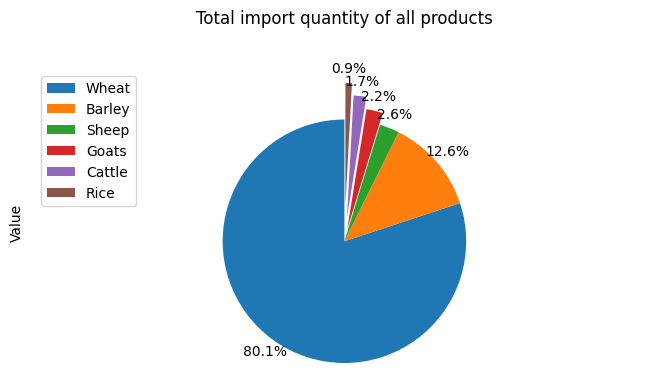

In [988]:
#Label = df_iq_total.index[0:7]
explode_list = [0, 0, 0, 0.1, 0.2, 0.3]
df_iq_total.plot(kind='pie', 
                 labels =None, 
                 figsize = (8,4),  
                 autopct='%1.1f%%',
                 explode = explode_list,
                 startangle=90, pctdistance=1.12)

plt.title('Total import quantity of all products', y=1.12)

plt.axis('equal')
#plt.ylabel(' ')
 
plt.legend(labels=df_iq_total.index, loc='upper left')
plt.show()

In [989]:
#Let's count the total import quantity of all countries by years 
val_year = df_iq.pivot_table(index = 'Area', columns = 'Year', values = 'Value')
val_year

Year,2000,2005,2010,2015,2020
Area,,,,,
Armenia,63360.666667,40281.000000,41659.111111,35262.777778,27162.500000
Azerbaijan,103185.857143,100560.900000,140500.200000,122919.692308,138565.916667
Georgia,119721.857143,111302.571429,80526.555556,43905.571429,52208.333333
Iran,952769.750000,151584.125000,246318.777778,414868.833333,183064.090909
Kazakhstan,756.555556,3662.900000,254422.200000,7435.857143,52471.428571
Russian Federation,370078.555556,94707.400000,94472.000000,46450.142857,28674.642857
Turkmenistan,1610.000000,0.000000,175000.000000,144.333333,8118.555556
Türkiye,131118.100000,30054.100000,339882.600000,418136.833333,953695.833333
Uzbekistan,82868.285714,13928.333333,60889.000000,116864.083333,248273.083333


In [990]:
val_year =  np.round(val_year,2).astype(str) 
val_year.columns



Int64Index([2000, 2005, 2010, 2015, 2020], dtype='int64', name='Year')

In [991]:
val_year.sort_values( by=[2020], ascending = False)
Styles = [dict(selector = "caption", 
           props = [("color", "red"), 
                    ("text-align", "right"),
                    ('font-size', '16px'), 
                    ('margin-bottom', '30px')])]

val_year = val_year.style.set_caption("The total Value of import quantity by years").set_table_styles(Styles)
val_year

Year,2000,2005,2010,2015,2020
Area,,,,,
Armenia,63360.67,40281.0,41659.11,35262.78,27162.5
Azerbaijan,103185.86,100560.9,140500.2,122919.69,138565.92
Georgia,119721.86,111302.57,80526.56,43905.57,52208.33
Iran,952769.75,151584.12,246318.78,414868.83,183064.09
Kazakhstan,756.56,3662.9,254422.2,7435.86,52471.43
Russian Federation,370078.56,94707.4,94472.0,46450.14,28674.64
Turkmenistan,1610.0,0.0,175000.0,144.33,8118.56
Türkiye,131118.1,30054.1,339882.6,418136.83,953695.83
Uzbekistan,82868.29,13928.33,60889.0,116864.08,248273.08


In [994]:
#;ets convert the pivot table to the dataframe and plot it 
#val_year_az = val_year.sort_values( by=[2020], ascending = False) 
val_year_az = val_year_az.reset_index()
pl_az = val_year_az[val_year_az['Area'] == 'Azerbaijan']
pl_az.columns[1:]

Index(['Area', 2000, 2005, 2010, 2015, 2020], dtype='object', name='Year')

In [993]:
pl_az.columns[1:]

Index([2000, 2005, 2010, 2015, 2020], dtype='object', name='Year')

In [587]:
#for col in pl_az.columns[1:]:
    #pl_az[col] = pl_az[col].astype(str)
    
    

In [729]:
pl_az.dtypes

Year
Area     object
2000    float64
2005    float64
2010    float64
2015    float64
2020    float64
dtype: object

In [730]:
pl_az

Year,Area,2000,2005,2010,2015,2020
3,Azerbaijan,103185.857,100560.9,140500.2,122919.692,138565.917


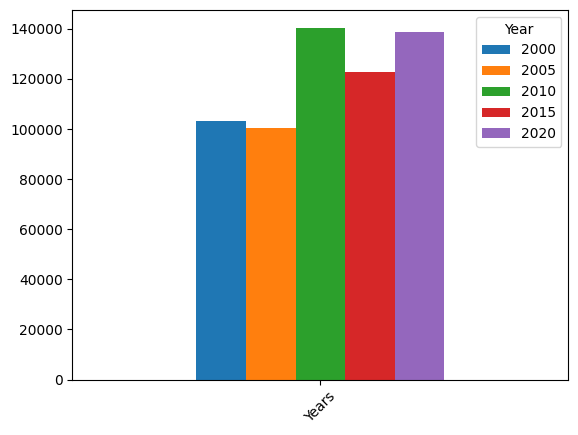

In [731]:
pl_az.plot(kind='bar')
plt.xticks([0] ,['Years'], rotation=45)
plt.show()

In [732]:
val_year.columns 

Int64Index([2000, 2005, 2010, 2015, 2020], dtype='int64', name='Year')

In [733]:
val_year.dtypes 

Year
2000    float64
2005    float64
2010    float64
2015    float64
2020    float64
dtype: object

In [734]:
# drive_wheels_counts.rename(columns = {'drive-wheels': 'value_counts'}, inplace = True)

In [735]:
val_year.index[1]

'Azerbaijan'

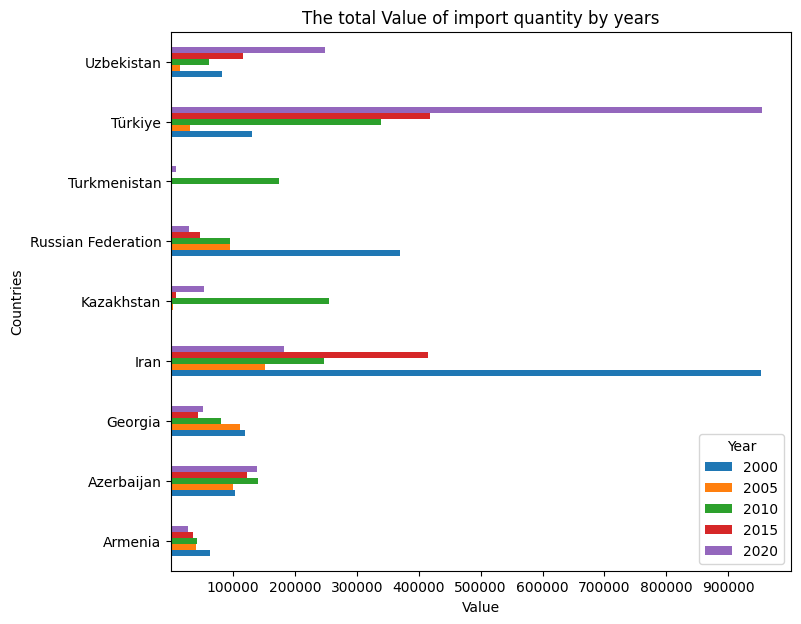

In [736]:
 
#x = np.arange(100000, 900000, 100000)
val_year.plot.barh(figsize=(8,7),   
             alpha=1,
             xlabel='Countries', ylabel='Values')
plt.title('The total Value of import quantity by years')
plt.xlabel("Value")
plt.ylabel("Countries")
#plt.xticks(bins)
 

plt.xticks(np.arange(100000, 1000000, 100000))
plt.show()

# I analyzed all the data related to "Import Quantity". The queries below have identical wording and there is no need to work on similar features again

df_iv = df.query("Element == 'Import Value'")
df_eq = df.query("Element == 'Export Quantity'")
df_ev = df.query("Element == 'Export Value'"

